In [1]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

# trace path
path_prefix = '~/maf1/invocations_per_function_md.anon.d'
num_days = 3
grain = 36
minutes = int(24 / grain * 60)

data = np.zeros(grain * num_days)

for i in range(1, num_days+1):
    if i < 10:
        i_str = '0' + str(i)
    else:
        i_str = str(i)

    path = path_prefix + i_str + '.csv'
    df = pd.read_csv(path)

    for j in range(grain):
        for k in range(1, 1 + minutes):
            data[(i - 1) * grain + j] += df[str(j * minutes + k)].sum()

print(data)

max_invocation = np.max(data)
print(max_invocation)
data = data / max_invocation


[22393367. 21641281. 21573936. 23176613. 22984431. 21865895. 23320405.
 23827224. 23408914. 24716225. 25232988. 24366564. 25773226. 26223282.
 25100046. 25830887. 26303945. 25738532. 26774854. 27562823. 27762701.
 28807107. 27917526. 28031197. 28151995. 27389326. 27437482. 27518676.
 27735201. 26366534. 25873224. 25518521. 24196215. 23750900. 23163648.
 22347688. 23771284. 23018611. 22493566. 23251497. 23352203. 22741044.
 22985199. 23920679. 22965866. 24390574. 25323156. 24760245. 26161934.
 25989222. 25058056. 25702255. 25861176. 25230603. 27832225. 27504941.
 27506851. 27722020. 28363879. 27065490. 27524638. 27218030. 26680600.
 28034336. 27386871. 26224501. 26715591. 26126796. 26167024. 26106752.
 24963086. 24406747. 25075262. 24401578. 24042614. 24500710. 23975459.
 22520302. 23211194. 23772373. 23019648. 24310455. 24221563. 24210930.
 24837915. 26019378. 24854536. 25707579. 25719848. 25269949. 26345475.
 26582030. 27043340. 27897192. 27274327. 27057975. 26643453. 26940454.
 27216

/tmp/ipykernel_164280/1652220831.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(x_ticklabels)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

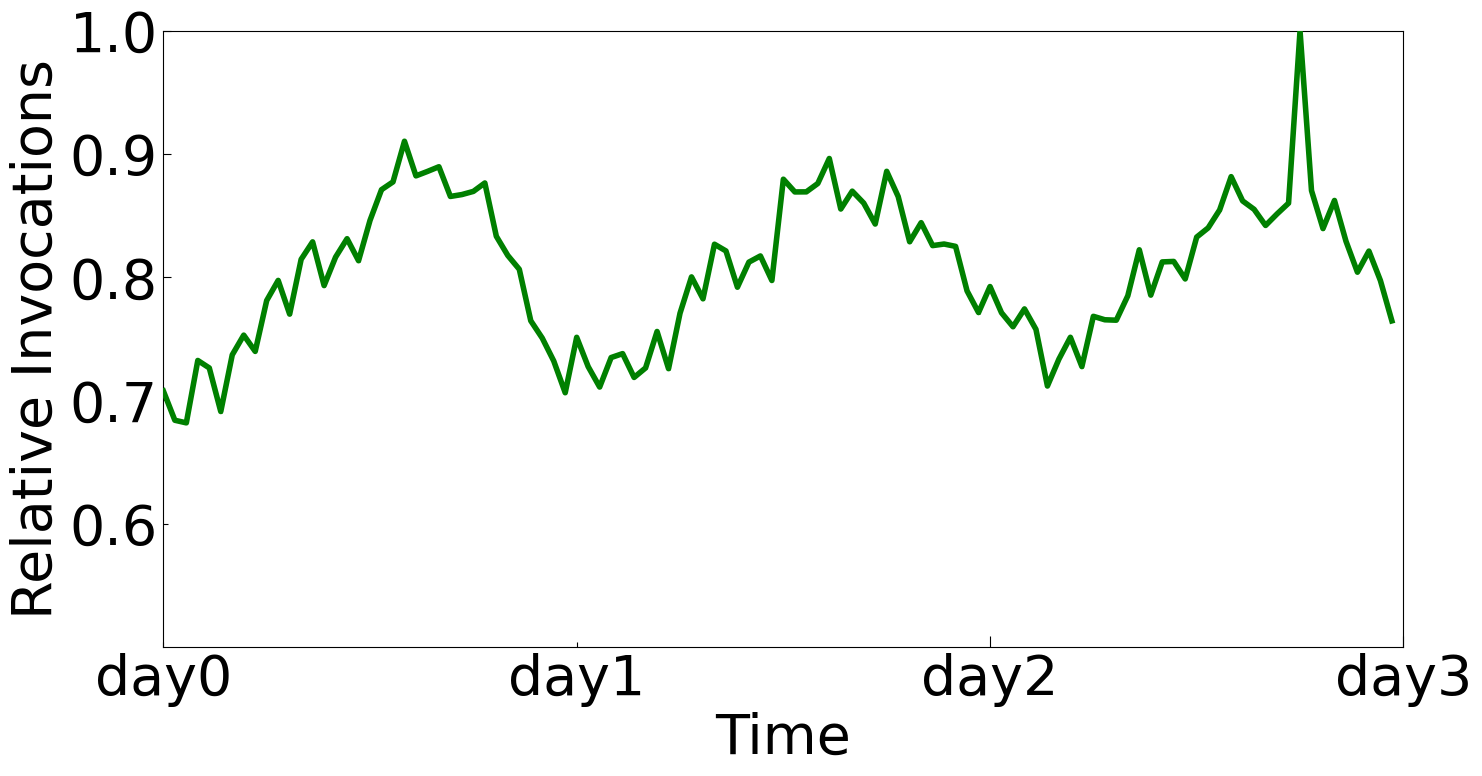

In [2]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# constants
num_subfigs = 1
num_curves = 1

# Set font and figure size
font_size = 40
plt.rc('font',**{'size': font_size})
plt.rc('pdf',fonttype = 42)

fig_size = (16, 8)
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

colors = {0: 'green', 1: 'dodgerblue', 2: 'darkorange'}
labels = {0: 'Wx',  1: 'BAx'}
markers = {0: 'o', 1: 's', 2: '^'}
linestyles = {0: 'solid', 1: '--', 2: 'solid'}

time = [i for i in range(0, grain * num_days)]

# x-axis setting
x_label = 'Time'
x_ticks = [i for i in range(0, grain * (num_days + 1), grain)]
x_ticklabels = ['day' + str(i) for i in range(0, (num_days + 1), 1)]

# y-axis setting
y_label = 'Relative Invocations'
y_ticks = [0.6, 0.7, 0.8, 0.9, 1]

axes.set_xlabel(x_label)
axes.set_xlim(left=0.5, right=6)
axes.get_xaxis().set_tick_params(direction='in', pad=7)
axes.get_xaxis().set_tick_params(which='minor', direction='in')
axes.set_xticklabels(x_ticklabels)
axes.set_xticks(x_ticks)

axes.set_ylabel(y_label)
axes.set_ylim(bottom=0.5, top=1)
axes.set_yticks(y_ticks)
axes.get_yaxis().set_tick_params(direction='in', pad=4)
axes.get_xaxis().set_tick_params(direction='in', pad=4)
axes.get_yaxis().set_tick_params(direction='in', pad=4)
axes.get_yaxis().set_tick_params(which='minor', direction='in')

lines = [[] for i in range(num_curves * 1)]
lines[0], = axes.plot(time, data, label=labels[0], marker = markers[0], color=colors[0], lw=4, markersize=1, linestyle=linestyles[0],zorder=3)

file_path = './figure7.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)